**1. Import jeopardy.csv and create a dataframe from the data. Find out the following:**

    a. How many rows are there in the dataframe? What does a row represent in this dataset? What is the “grain”?
    
    b. Clean the data. How do you need to “clean” it? What is “dirty” about this data?
    
    c. How many unique shows were there each year?
    
    d. How many times was each category used?
    
    e. Which month (over the years) has had the most shows?
    
    f. Are there any answers that appeared multiple times? Find the questions for the top three most common answers.

In [16]:
# Load libraries
import pandas as pd
import numpy as np

# Import jeopardy.csv and 
Jeopardy = "JEOPARDY_CSV.csv"

jeo_df = pd.read_csv(Jeopardy)

In [17]:
# create a dataframe from the data
jeo_df = pd.DataFrame(jeo_df)
jeo_df.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,12/31/2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


**a. How many rows are there in the dataframe? What does a row represent in this dataset? What is the “grain”?**

In [19]:
# Get the index(rows) from the data frame
jeo_index=jeo_df.index

# Find length of index to get number of rows
jeo_rows=len(jeo_index)

print(f'The Jeopardy data set has {jeo_rows} rows. Each row represents individual questions asked on a show.')

The Jeopardy data set has 216930 rows. Each row represents individual questions asked on a show.


In [ ]:
# What is the “grain”?
## The granularity is each individual question on each individual show

**b. Clean the data. How do you need to “clean” it? What is “dirty” about this data?**

In [ ]:
# Remembering from last exercise. Things to clean...

### We need to...
### 1) Remove spaces from column names
### 2) Convert the date variable to something we can work with 

## This is what makes the data "dirty" and a little difficult to work with.
### Once we do that, we will be good for the purposes of this analysis

In [20]:
# printing column names
for col in jeo_df.columns:
    print(col)

Show Number
 Air Date
 Round
 Category
 Value
 Question
 Answer


In [21]:
# Example of extra space
print(jeo_df[' Air Date'])

0         12/31/2004
1         12/31/2004
2         12/31/2004
3         12/31/2004
4         12/31/2004
             ...    
216925     5/11/2006
216926     5/11/2006
216927     5/11/2006
216928     5/11/2006
216929     5/11/2006
Name:  Air Date, Length: 216930, dtype: object


In [22]:
# remove spaces in columns name
jeo_df.columns = jeo_df.columns.str.replace(' ','')
jeo_df.head()

# Now, we have no spaces, which should avoid confusion!

,ShowNumber,AirDate,Round,Category,Value,Question,Answer
0,4680,12/31/2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [23]:
#Check that it worked
print(jeo_df['AirDate'])

0         12/31/2004
1         12/31/2004
2         12/31/2004
3         12/31/2004
4         12/31/2004
             ...    
216925     5/11/2006
216926     5/11/2006
216927     5/11/2006
216928     5/11/2006
216929     5/11/2006
Name: AirDate, Length: 216930, dtype: object


In [24]:
# Now, convert the date variable to make it more workable
years = pd.DatetimeIndex(jeo_df['AirDate']).year

# Now, we have a date variable that is the proper type and is no longer a string

**c. How many unique shows were there each year?**

In [25]:
# Group by 'years' (that we just created)
grouped_years = jeo_df.groupby(years)['ShowNumber']

# Find the unique shows (through show number) per year
grouped_years.nunique()

AirDate
1984     23
1985     16
1986     25
1987     22
1988     22
1989     36
1990     73
1991     24
1992     32
1993     35
1994     19
1995     19
1996     83
1997    221
1998    223
1999    229
2000    225
2001    203
2002    114
2003    158
2004    220
2005    225
2006    230
2007    231
2008    232
2009    226
2010    231
2011    224
2012     19
Name: ShowNumber, dtype: int64

In [26]:
# Show as data frame
jeo_by_year = pd.DataFrame(grouped_years.nunique())
jeo_by_year 

,ShowNumber
AirDate,
1984,23
1985,16
1986,25
1987,22
1988,22
1989,36
1990,73
1991,24
1992,32


**d. How many times was each category used?**

In [62]:
# Group by category
grouped_cat = jeo_df.groupby('Category')

# Find the count
grouped_cat['Category'].count()

Category
 A JIM CARREY FILM FESTIVAL    5
"!"                            5
"-ARES"                        5
"-ICIAN" EXPEDITION            5
"...OD" WORDS                  5
                              ..
“R” MOVIES                     5
“SAINTS”                       4
“SOUTH”                        5
“STREETS”                      5
“WH”AT IS IT?                  5
Name: Category, Length: 27983, dtype: int64

In [109]:
# Make data frame
cat_df = pd.DataFrame({'Count':grouped_cat['Category'].count()
    
} )

# This data frame will allow us to see how many times each category was used
cat_df.sort_values('Count', ascending=False)

,Count
Category,
BEFORE & AFTER,547
SCIENCE,519
LITERATURE,496
AMERICAN HISTORY,418
POTPOURRI,401
...,...
FOREIGN-BORN INVENTORS,1
WORD HISTORIES,1
FOREIGN WARS,1


In [110]:
cat_df['Count'].mean() # Categories were recycled an average of 8 times

7.752206696923132

**e. Which month (over the years) has had the most shows?**

In [38]:
# Find the individual months
months = pd.DatetimeIndex(jeo_df['AirDate']).month

In [39]:
# Group by 'months' (that we just created)
grouped_months = jeo_df.groupby(months)['ShowNumber']

# Find the unique number of shows for each month
grouped_months.nunique()

AirDate
1     355
2     293
3     329
4     330
5     351
6     321
7     256
9     272
10    347
11    434
12    352
Name: ShowNumber, dtype: int64

In [40]:
# Show as data frame
jeo_by_month = pd.DataFrame(grouped_months.nunique())
jeo_by_month

,ShowNumber
AirDate,
1,355
2,293
3,329
4,330
5,351
6,321
7,256
9,272
10,347


In [41]:
# Sort values
jeo_by_month.sort_values('ShowNumber', ascending=False)

,ShowNumber
AirDate,
11,434
1,355
12,352
5,351
10,347
4,330
3,329
6,321
2,293


In [42]:
## NOVEMBER is the month that has had the largest number of shows, over the years!

**f. Are there any answers that appeared multiple times? Find the questions for the top three most common answers.**

In [49]:
# Group by 'Answers'
grouped_answers = jeo_df.groupby('Answer')
grouped_answers

In [80]:
# Look at group
grouped_answers.head()

,ShowNumber,AirDate,Round,Category,Value,Question,Answer
0,4680,12/31/2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams
...,...,...,...,...,...,...,...
216924,4999,5/11/2006,Double Jeopardy!,OFF-BROADWAY,"$2,000",In 2006 the cast of this long-running hit emba...,Stomp
216925,4999,5/11/2006,Double Jeopardy!,RIDDLE ME THIS,"$2,000",This Puccini opera turns on the solution to 3 ...,Turandot
216926,4999,5/11/2006,Double Jeopardy!,"""T"" BIRDS","$2,000",In North America this term is properly applied...,a titmouse
216927,4999,5/11/2006,Double Jeopardy!,AUTHORS IN THEIR YOUTH,"$2,000","In Penny Lane, where this ""Hellraiser"" grew up...",Clive Barker


In [87]:
# Create a new data frame that is grouped by answers, but also contains the question and answer count 
grouped_answers_df = pd.DataFrame({'Question':grouped_answers['Question'],
                                  'Answer_Count':grouped_answers['Answer'].count()})

This data set displays the questions for the top three most common answers

And yes...answers are definitely used multiple times!

In [91]:
# Sort the data frame so that we know which answers were most frequent
top3_answers = grouped_answers_df.sort_values('Answer_Count', ascending=False).head(3)

# Make this a new data frame, so that we can isolate our top-3 more easily
top3_answers_df = pd.DataFrame(top3_answers)
top3_answers_df

,Question,Answer_Count
Answer,,
China,"(China, [In 1958 this country launched its sec...",216
Australia,"(Australia, [A 1994 festival honoring this cou...",215
Japan,"(Japan, [In February 1904 this country attacke...",196


**2. Create a visualization that shows the top 5 categories (those referenced the most often). Be sure to label appropriately.**

In [68]:
# First, sort values to see what the top 5 are
cat_df.sort_values('Count', ascending=False).head()

,Count
Category,
BEFORE & AFTER,547
SCIENCE,519
LITERATURE,496
AMERICAN HISTORY,418
POTPOURRI,401


In [71]:
# Next, make a new data frame of only the top 5 values
top5 = cat_df.sort_values('Count', ascending=False).head()
top5_df = pd.DataFrame(top5)
top5_df

,Count
Category,
BEFORE & AFTER,547
SCIENCE,519
LITERATURE,496
AMERICAN HISTORY,418
POTPOURRI,401


In [72]:
# Now, make the visualization


# Selecting bar chart, due to us having categorical data and not that many categories
import matplotlib.pyplot as plt

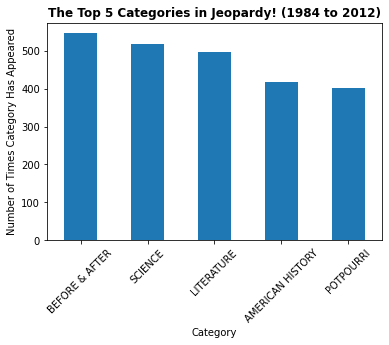

In [78]:
# Create the bar plot
top5_df['Count'].plot(kind='bar', 
                      xlabel='Category',
                      ylabel='Number of Times Category Has Appeared')
plt.xticks(rotation=45)
plt.title('The Top 5 Categories in Jeopardy! (1984 to 2012)', fontsize=12, fontweight='bold')

# Display our chart
plt.show()